#####PRUEBA PYTHON
###Nombre: Judith Gomez
###Fecha: 19 de Junio 2022

#Se cargan todas las librerias para comenzar el desarrollo del analisis de la base de datos casen 2017.

In [2]:
import time
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#Se carga la base de datos en ambiente Python

In [3]:
import pandas as pd
d_casen = pd.read_csv('CASEN_2017.csv', sep=';', encoding='latin-1')
print(d_casen)

C:\Users\YU\AppData\Local\Temp\ipykernel_9140\3065200164.py:2: DtypeWarning: Columns (25,26,51,60,62,77,93,96,97,99,108,109,117,136,137,138,151,152,153,154,156,157,158,159,160,161,162,163,164,165,167,168,169,170,172,173,174,175,176,177,178,179,180,181,182,183,185,186,187,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,212,235,240,252,255,257,272,273,274,275,276,279,280,281,282,283,285,286,289,290,291,292,293,294,295,305,307,323,336,337,353,357,365,373,399,403,404,405,409,412,470,506,509,510,512,514,517,518,522,528,529,531,532,533,534,536) have mixed types. Specify dtype option on import or set low_memory=False.
  d_casen = pd.read_csv('CASEN_2017.csv', sep=';', encoding='latin-1')


                folio  o  id_vivienda  hogar                        region  \
0        110110020201  1   1101100202      1            Región de Tarapacá   
1        110110020301  1   1101100203      1            Región de Tarapacá   
2        110110020401  1   1101100204      1            Región de Tarapacá   
3        110110020401  2   1101100204      1            Región de Tarapacá   
4        110110020501  1   1101100205      1            Región de Tarapacá   
...               ... ..          ...    ...                           ...   
216434  1520130021601  1  15201300216      1  Región de Arica y Parinacota   
216435  1520130021601  2  15201300216      1  Región de Arica y Parinacota   
216436  1520130021701  1  15201300217      1  Región de Arica y Parinacota   
216437  1520130021701  2  15201300217      1  Región de Arica y Parinacota   
216438  1520130021801  1  15201300218      1  Región de Arica y Parinacota   

         provincia   comuna    zona  expr  expc  ...  hh_d_esta

#Informacion de los datos  casen 2017.

In [4]:
with pd.option_context('display.max_columns', None): display(d_casen.head(3))


,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,expr_div,varstrat,varunit,fecha_dia,fecha_mes,fecha_año,tot_hog,tot_per,tot_par,tot_nuc,pres,marca,pco1,sexo,edad,h4m,h4a,ecivil,h6l,h6h,pareja,nucleo,pco2,h9a,h9a_esp,h9,h10a,h10b,h10c,h10d,h10e,h10f,e1,e2,e3,e4,e4_esp,e5a,e5a_esp,e5b,e6a,e6b,e7,e7_subarea,e7_cod_area,e8,e9nom,e9dir,e9com,e9com_c_cod,e9com_p_cod,e9rbd,e9rbd_sup,e9depen,e9dv,e9te,e9sup_g,e10,e11,e12a,e12b,e12c,e12d,e12e,e13a,e13b1,e13b1_esp,e13b2,e13b2_esp,e14pbu,e14pbt,e14pbd,e14pbm,e14bu,e14bt,e14bd,e14bm,e14bpc,e14mu,e14mt,e14md,e14mm,e15a,e15b,e16,e17,e18a,e18b,e19_1,e19_2,e0,o1,o2,o3,o4,o5,o6,o7r1,o7r2,o8,o9a,o9b,oficio4,oficio1,o10,o11,o12,o13,o14,o15,o16,o17,o18,o19,o20,o21,o22,rama4_sub,rama1_sub,rama4,rama1,o23,o24a,o24b,o24c,o24d,o25a_hr,o25a_min,o25b,o25c,o25c_esp,o25d,o25e,o26,o27,o28,o29,o29_esp,o30,o0,ch1,y1,y2_dias,y2_hrs,y3a,y3ap,y3b,y3bp,y3c,y3cp,y3d,y3dp,y3e,y3ep,y3f,y3fp,y3f_esp,y4a,y4b,y4c,y4d,y4d_esp,y5a,y5b,y5c,y5d,y5e,y5f,y5g,y5h,y5i,y5j,y5k,y5l,ch2,y6,y7,y8,y9,ch3,y10,y11,y12a,y12b,y13a,y13b,y13c,y14a,y14b,y14c,y15a,y15b,y15c,y16a,y16b,y17,y18a,y18b,y18c,y18d,y18d_esp,y19t,y19n,y20a,y20b,y20c,y20d,y20e,y20amonto,y20bmonto,y20cmonto,y20dmonto,y20emonto,y21a,y21b,y22a,y22b,y22c,y22d,y22e,y22amonto,y22bmonto,y22cmonto,y22dmonto,y22emonto,y23a,y23b,y23c,y23bmonto,y23cmonto,y24,y24_o,y25a,y25b,y25c,y25d,y25amonto,y25bmonto,y25cmonto,y25dmonto,y25e,y25e_o,y25ep,y25f,y25f_o,y25fp,y25g,y25gp,y25g_esp,y26_1a,y26_1b,y26_1c,y26_1d,y26_1e,y26_1f,y26_1g,y26_1h,y26_1i,y26_1j,y26_1jesp,y26_1amonto,y26_1dmonto,y26_2bm1,y26_2bm2,y26_3b_in,y26_4b_mo,y26_2c,y26_3c_in,y26_4c_mo,y26_2em1,y26_2em2,y26_3e_in,y26_4e_mo,y26_2f,y26_3f_in,y26_4f_mo,y26_2g,y26_3g_in,y26_4g_mo,y26_2h,y26_3h_in,y26_4h_mo,y26_2i,y26_2j,y26_3j_in,y26_4j_mo,y27a,y27b,y27c,y27d,y27e,y27f,y27g,y0,s1,s1c,s2a1,s2a2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s13p,s14,s15,s16,s17,s18a,s18b,s18c,s18d,s18e,s19a,s19b,s19c,s20a,s20b,s20c,s21a,s21b,s21c,s22a,s22b,s22c,s23a,s23b,s23c,s24a,s24b,s24c,s25a,s25b,s25c,s26a,s26b_c1,s26b_c2,s26b_c3,s26c,s26d,s27a,s27b,s27c,s27d,s28,s29,s30,s31a1,s31a2,s31a3,s32a,s32b,s32c,s32d,s32e,s32f,s33a1,s33a2,s33b1,s33b2,s33c1,s33c2,s33d1,s33d2,s33e1,s33e2,s33f1,s33f2,s33g1,s33g2,s33h1,s33h2,s33i1,s33i2,s33j1,s33j2,ch4,s34a,s34b_ord,s34c,s0,r1a,r1a_esp,r1a_cod,r1b,r1b_esp,r1b_c_cod,r1b_p_cod,r1c_año,r1cp,r2,r2_esp,r2_c_cod,r2_p_cod,r3,r4,r5,r6,r6_esp,r7a,r7b,r7c,r7d,r7e,r7f,r7g,r7h,r7i,r7j,r7k,r8a,r8b,r8c,r8d,r8e,r8f,r8g,r8h,r9a,r9b,r9c,r9d,r9e,r9f,r9g,r9h,r9i,r9j,r9k,r9l,r9m,r9n,r9o,r9p,r9q,r9r,r9r_esp,r9s,r10a,r10b,r10c,r10d,r10e,r10f,r10g,r10h,r10i,r10i_esp,r11,r12a,r12b,r13a,r13b,r14,r15,r16a,r16b,r16c,r16d,r16e,r17a,r17b,r17c,r17d,r18,r19,r20,r21a,r21b,r21c,r21d,r21e,r21f,r21g,r21h,r21i,r21j,r22,r23,r23_esp,r24,r24_esp,r0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11_o1,v11_o2,v12,v12mt,v13,v14,v15,v16,v17,v18,v19,v20,v20_esp,v21,v22,v23,v24,v25,v26,v27a,v27b,v28,v29,v30a,v30b,v31,v31_esp,v32,v32_esp,v33,v34,v34_esp,v35,v35_esp,v36a,v36b,v36c,v37a,v37b,v37c,v37d,v37e,v37f,v37g,v37h,v37i,v38a,v38b,v38c,v38d,v38e,v39a,v39b,v39c,v39d,v39e,v39f,v39g,v40,v40_esp,v0a_1,v0a_2,v0a_3,v0b,y0101,y0301,y0302,y0303,y0304,y0305,y0306,y0401,y0402,y0403,y0404,y0501,y0502,y0503,y0504,y0505,y0506,y0507,y0508,y0509,y0510,y0511,y0512,yids,yosa,yta1,y0701,y0801,y0901,yac2,y1101,yosi,yta2,yre1,yama,yah1,yah2,yrut,yre2,yre3,y260201,y260202,y2603,yinv01,yinv02,yinv03,ymon,yorf,yesp,yotp,y2601,y2604,ymes,yfa1,yfa2,ydes,ydon,ydim,yotr,y2301,y2401,y2501,y2502,y2503,y2504,y2505,y2506,y2507,y2302,y2303,y2001,y2002,y2003,y2004,y2005,y2201,y2202,y2203,y2204,y2205,yfam,ytro,yaut,ysub,ytot,y0101h,y0301h,y0302h,y0303h,y0304h,y0305h,y0306h,y0401h,y0402h,y0403h,y0404h,y0501h,y0502h,y0503h,y0504h,y0505h,y0506h,y0507h,y0508h,y0509h,y0510h,y0511h,y0512h,yosah,ytroh,yta1h,y0701h,y0801h,y0901h,yosih,yta2h,yruth,yac2h,ydesh,yidsh,yotrh,y260201h,y2603h,yinv01h,yinv03h,ymonh,yorfh,yotph,yre1h,yre2h,yre3h,yamah,yah1h,yah2h,ydonh,ymesh,yfa1h,yfa2h,y1101h,yd

#Nombre de las columnas de la base de datos casen 2017

In [5]:
print(d_casen.columns)

Index(['folio', 'o', 'id_vivienda', 'hogar', 'region', 'provincia', 'comuna',
       'zona', 'expr', 'expc',
       ...
       'hh_d_estado', 'hh_d_servbas', 'hh_d_entorno', 'hh_d_accesi',
       'hh_d_medio', 'hh_d_appart', 'hh_d_tsocial', 'hh_d_seg',
       'pobreza_multi_4d', 'pobreza_multi_5d'],
      dtype='object', length=804)


#Se crea un data frame con las variables a tratar en el analisis casen 2017

In [6]:
d_casen1 = pd.concat([d_casen['y1'], 
d_casen['y2_hrs'], 
d_casen['y2_dias'], 
d_casen['edad'], 
d_casen['sexo'], 
d_casen['ch1']], axis = 1)
d_casen1.head(10)


,y1,y2_hrs,y2_dias,edad,sexo,ch1
0,NaN,NaN,NaN,56,Mujer,Patrón o empleador/ Trabajador Cuenta Propia
1,200000,216,30,21,Mujer,Asalariado
2,270000,192,30,24,Hombre,Asalariado
3,300000,192,30,28,Hombre,Asalariado
4,320000,192,30,26,Hombre,Asalariado
5,NaN,NaN,NaN,26,Mujer,Familiar no Remunerado/ Inactivos y Desocupados
6,NaN,NaN,NaN,1,Mujer,Menores de 12 años
7,NaN,NaN,NaN,62,Mujer,Patrón o empleador/ Trabajador Cuenta Propia
8,NaN,NaN,NaN,36,Mujer,Familiar no Remunerado/ Inactivos y Desocupados
9,270000,160,30,59,Mujer,Asalariado


#Los 10 ultimos valores

In [7]:

d_casen1.tail(10) 

,y1,y2_hrs,y2_dias,edad,sexo,ch1
216429,150000,80,30.0,40,Mujer,Asalariado
216430,NaN,NaN,NaN,74,Hombre,Familiar no Remunerado/ Inactivos y Desocupados
216431,NaN,NaN,NaN,67,Mujer,Familiar no Remunerado/ Inactivos y Desocupados
216432,NaN,NaN,NaN,43,Hombre,Familiar no Remunerado/ Inactivos y Desocupados
216433,NaN,NaN,NaN,78,Hombre,Familiar no Remunerado/ Inactivos y Desocupados
216434,NaN,NaN,NaN,64,Mujer,Familiar no Remunerado/ Inactivos y Desocupados
216435,NaN,NaN,NaN,64,Hombre,Patrón o empleador/ Trabajador Cuenta Propia
216436,NaN,NaN,NaN,66,Hombre,Familiar no Remunerado/ Inactivos y Desocupados
216437,NaN,NaN,NaN,60,Mujer,Patrón o empleador/ Trabajador Cuenta Propia
216438,NaN,NaN,NaN,48,Mujer,Patrón o empleador/ Trabajador Cuenta Propia


#Nombre de las columnas y datos (las 3 primeras filas)

In [106]:
with pd.option_context('display.max_columns', None): display(d_casen1.head(3))

,y1,y2_hrs,y2_dias,edad,sexo,ch1
0,0.0,0.0,0.0,56.0,2.0,1.0
1,200000.0,216.0,30.0,21.0,2.0,4.0
2,270000.0,192.0,30.0,24.0,1.0,4.0


#Sumar todos los "Nan" values de cada variable.

In [107]:

print(d_casen1.isna().sum())

y1         0
y2_hrs     0
y2_dias    0
edad       0
sexo       0
ch1        0
dtype: int64


#Se reemplazan los Nan por '0'. 

In [108]:

df2 = pd.DataFrame(d_casen1)
df2=df2.fillna(0, inplace=True)
print(d_casen1)

              y1  y2_hrs  y2_dias  edad  sexo  ch1
0            0.0     0.0      0.0  56.0   2.0  1.0
1       200000.0   216.0     30.0  21.0   2.0  4.0
2       270000.0   192.0     30.0  24.0   1.0  4.0
3       300000.0   192.0     30.0  28.0   1.0  4.0
4       320000.0   192.0     30.0  26.0   1.0  4.0
...          ...     ...      ...   ...   ...  ...
216434       0.0     0.0      0.0  64.0   2.0  2.0
216435       0.0     0.0      0.0  64.0   1.0  1.0
216436       0.0     0.0      0.0  66.0   1.0  2.0
216437       0.0     0.0      0.0  60.0   2.0  1.0
216438       0.0     0.0      0.0  48.0   2.0  1.0

[216439 rows x 6 columns]


#Se confirma que no existan Nan

In [11]:
print(d_casen1.isna().sum())


y1         0
y2_hrs     0
y2_dias    0
edad       0
sexo       0
ch1        0
dtype: int64


#Recuento de valores ùnicos y se encuentran 'No sabe'

In [12]:
d_casen1['y1'].value_counts()

0          147809
270000       6692
300000       5278
No sabe      4354
400000       4103
            ...  
2290000         1
201600          1
674000          1
220200          1
521000          1
Name: y1, Length: 1191, dtype: int64

#Se reemplaza los 'No sabe' en el dataframe con valor '0'

In [13]:
d_casen1.replace(to_replace=r'No sabe', value='0', regex=True, inplace=True)

#Se verifica el cambio en la dataframe

In [14]:
d_casen1['y1'].value_counts()

0         147809
270000      6692
0           5531
300000      5278
400000      4103
           ...  
827000         1
864000         1
496000         1
670600         1
521000         1
Name: y1, Length: 1190, dtype: int64

#Con la data limpia de "Nan" y "No sabe", se verifican que tipo de datos son, para comenzar el analisis.

#Convertir caracter en numero Hombre = 1, Mujer=2

In [15]:
d_casen1['sexo'].replace(['Hombre','Mujer'],[1,2],inplace=True)
print(d_casen1)

            y1 y2_hrs y2_dias  edad  sexo  \
0            0      0       0    56     2   
1       200000    216      30    21     2   
2       270000    192      30    24     1   
3       300000    192      30    28     1   
4       320000    192      30    26     1   
...        ...    ...     ...   ...   ...   
216434       0      0       0    64     2   
216435       0      0       0    64     1   
216436       0      0       0    66     1   
216437       0      0       0    60     2   
216438       0      0       0    48     2   

                                                    ch1  
0          Patrón o empleador/ Trabajador Cuenta Propia  
1                                            Asalariado  
2                                            Asalariado  
3                                            Asalariado  
4                                            Asalariado  
...                                                 ...  
216434  Familiar no Remunerado/ Inactivos y Desocupad

#Convertir caracter en numero Patrón o empleador/ Trabajador Cuenta Propia= 1; Familiar no Remunerado/ Inactivos y Desocupados=2; Menores de 12 años=3; Asalariado=4

In [16]:
d_casen1['ch1'].replace(['Patrón o empleador/ Trabajador Cuenta Propia','Familiar no Remunerado/ Inactivos y Desocupados','Menores de 12 años','Asalariado'],[1,2,3,4],inplace=True)
print(d_casen1)

            y1 y2_hrs y2_dias  edad  sexo  ch1
0            0      0       0    56     2    1
1       200000    216      30    21     2    4
2       270000    192      30    24     1    4
3       300000    192      30    28     1    4
4       320000    192      30    26     1    4
...        ...    ...     ...   ...   ...  ...
216434       0      0       0    64     2    2
216435       0      0       0    64     1    1
216436       0      0       0    66     1    2
216437       0      0       0    60     2    1
216438       0      0       0    48     2    1

[216439 rows x 6 columns]


In [17]:
d_casen1['ch1'].value_counts()

2    83084
4    68630
3    41363
1    23362
Name: ch1, dtype: int64

In [18]:
d_casen1['y1'].value_counts()

0         147809
270000      6692
0           5531
300000      5278
400000      4103
           ...  
827000         1
864000         1
496000         1
670600         1
521000         1
Name: y1, Length: 1190, dtype: int64

#Se realiza conversion de datos a tipo numerico float

In [19]:
d_casen1['y1'] = d_casen1['y1'].astype(str).astype(float)
d_casen1['y2_dias'] = d_casen1['y2_dias'].astype(str).astype(float)
d_casen1['y2_hrs'] = d_casen1['y2_hrs'].astype(str).astype(float)
d_casen1['edad'] = d_casen1['edad'].astype(str).astype(float)
d_casen1['sexo'] = d_casen1['sexo'].astype(str).astype(float)
d_casen1['ch1'] = d_casen1['ch1'].astype(str).astype(float)

#Se verifica que todos los datos son numericos

#Descripciòn de todas las variables

In [20]:
d_casen1.describe()

,y1,y2_hrs,y2_dias,edad,sexo,ch1
count,2.164390e+05,216439.000000,216439.000000,216439.000000,216439.000000,216439.000000
mean,1.485466e+05,50.430440,6.949136,37.780257,1.522628,2.717343
std,3.921060e+05,80.754857,10.890627,22.950752,0.499489,1.026069
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000e+00,0.000000,0.000000,19.000000,1.000000,2.000000
50%,0.000000e+00,0.000000,0.000000,36.000000,2.000000,3.000000
75%,2.400000e+05,136.000000,20.000000,56.000000,2.000000,4.000000
max,3.400000e+07,848.000000,30.000000,117.000000,2.000000,4.000000


Se consideran todos los encuestados mayores a 15 años, para analizar la brecha salarial.

In [86]:
d_casen2 = d_casen1.drop(d_casen1[d_casen1['edad']<15].index)

In [87]:
d_casen2['y1'].mean()

183641.8557312253

In [88]:
print(d_casen2)

              y1  y2_hrs  y2_dias  edad  sexo  ch1
0            0.0     0.0      0.0  56.0   2.0  1.0
1       200000.0   216.0     30.0  21.0   2.0  4.0
2       270000.0   192.0     30.0  24.0   1.0  4.0
3       300000.0   192.0     30.0  28.0   1.0  4.0
4       320000.0   192.0     30.0  26.0   1.0  4.0
...          ...     ...      ...   ...   ...  ...
216434       0.0     0.0      0.0  64.0   2.0  2.0
216435       0.0     0.0      0.0  64.0   1.0  1.0
216436       0.0     0.0      0.0  66.0   1.0  2.0
216437       0.0     0.0      0.0  60.0   2.0  1.0
216438       0.0     0.0      0.0  48.0   2.0  1.0

[175076 rows x 6 columns]


calcular el promedio del salario por sexo (Hombre=1 ; Mujer=2)
Se puede apreciar que los hombres reciben en promedio el sueldo mayor.

In [89]:
df = d_casen2.groupby(['sexo'])['y1'].mean()
df

sexo
1.0    241419.531752
2.0    132580.663589
Name: y1, dtype: float64

<AxesSubplot:title={'center':'Promedio del salario por sexo'}, xlabel='sexo'>

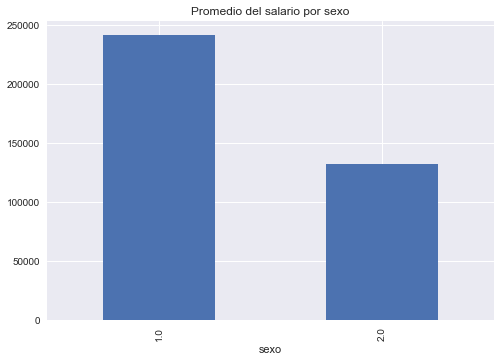

In [90]:
df = d_casen2.groupby(['sexo'])['y1'].mean().plot(kind='bar', title='Promedio del salario por sexo')
df

calcular la cantidad de personasde acuerdo a su sexo y actividad (empleador/ Trabajador Cuenta Propia= 1; Familiar no Remunerado/ Inactivos y Desocupados=2; Asalariado=4 )

In [163]:
df2 = d_casen2.groupby(['ch1'])['sexo'].count()
df2

ch1
1.0    23362
2.0    83084
4.0    68630
Name: sexo, dtype: int64

De acuerdo al grafico se aprecia que la mayor cantidad de personas se concentran en el grupo de "Familiar no Remunerado/ Inactivos y Desocupados"

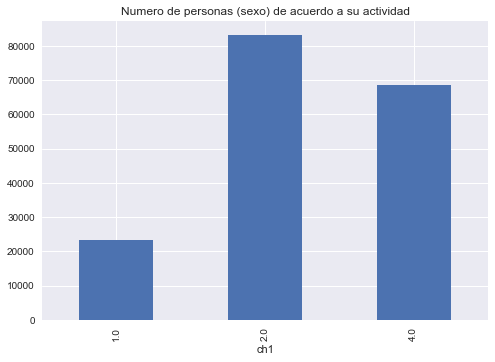

In [164]:
df1 = d_casen2.groupby(['ch1'])['sexo'].count().plot(kind='bar', title='Numero de personas (sexo) de acuerdo a su actividad')

Gràfico de barras de "sexo" (Hombres=1 y mujeres=2) v/s "ch1" (empleador/ Trabajador Cuenta Propia= 1; Familiar no Remunerado/ Inactivos y Desocupados=2; Asalariado=4 )
Se puede apreciar una mayor concentracion de mujeres que pertenecen a "Familiar no Remunerado/ Inactivos y Desocupados"(mayores de 15 años).
Y que el mayor porcentaje de "asalariados" pertenece a los hombre.

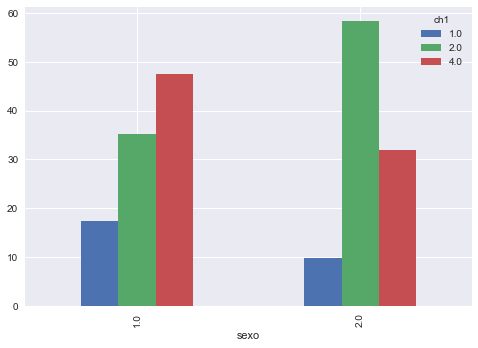

In [150]:
plot = pd.crosstab(index=d_casen2['sexo'],
columns=d_casen2['ch1']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

Càlculo de correlaciòn y significacia entre dos variables
El test de correlacion muestra una relaciòn lineal, de intensidad considerable (r=0.797) y significativa (p-value = 0,0). Tiene sentido intentar generar un modelo de regresion lineal con el objeto de predecir la actividad en funciòn  al numero de dias trabajados.

In [203]:
from scipy import stats
r, p = stats.pearsonr(d_casen1['ch1'], d_casen1['y2_dias'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['ch1'], d_casen1['y2_hrs'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['y1'], d_casen1['y2_dias'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['ch1'], d_casen1['y1'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['ch1'], d_casen1['sexo'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['y1'], d_casen1['sexo'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['y1'], d_casen1['edad'])
print(f"Correlación de Pearson: r={r}, p-value={p}")
r, p = stats.pearsonr(d_casen1['sexo'], d_casen1['edad'])
print(f"Correlación de Pearson: r={r}, p-value={p}")

Correlación de Pearson: r=0.7976529777942959, p-value=0.0
Correlación de Pearson: r=0.7806568933002054, p-value=0.0
Correlación de Pearson: r=0.5395502880789553, p-value=0.0
Correlación de Pearson: r=0.4735821772983346, p-value=0.0
Correlación de Pearson: r=-0.09691710748335335, p-value=0.0
Correlación de Pearson: r=-0.10571141203460166, p-value=0.0
Correlación de Pearson: r=0.07577583917958337, p-value=5.142326276619352e-273
Correlación de Pearson: r=0.05428881359494205, p-value=5.973938539700342e-141


Detecciòn de valores atipicos mediante Boxplot 
Se encontraron valores atipicos en "y1"

{'whiskers': [<matplotlib.lines.Line2D at 0x1b485beef50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b485bef4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b485beec80>],
 'medians': [<matplotlib.lines.Line2D at 0x1b485befa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b485befd60>],
 'means': []}

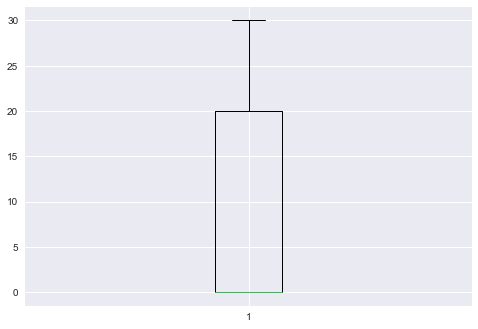

In [193]:
plt.boxplot(d_casen2['y2_dias'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b485bb0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b485bb1150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b485bb08e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b485bb16f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b485bb19c0>],
 'means': []}

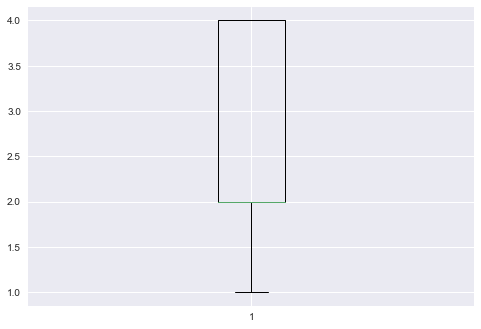

In [192]:
plt.boxplot(d_casen2['ch1'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b48d96e710>,
 'caps': [<matplotlib.lines.Line2D at 0x1b48d96ecb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b48d96e440>],
 'medians': [<matplotlib.lines.Line2D at 0x1b48d96f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b48d96f520>],
 'means': []}

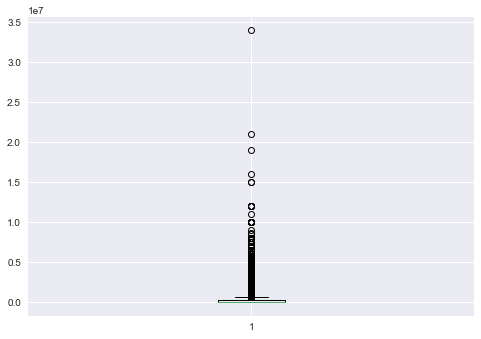

In [239]:
plt.boxplot(d_casen2['y1'], notch=None, vert=None, patch_artist=None, widths=None)

array([[<AxesSubplot:title={'center':'y1'}>,
        <AxesSubplot:title={'center':'y2_hrs'}>],
       [<AxesSubplot:title={'center':'y2_dias'}>,
        <AxesSubplot:title={'center':'edad'}>],
       [<AxesSubplot:title={'center':'sexo'}>,
        <AxesSubplot:title={'center':'ch1'}>]], dtype=object)

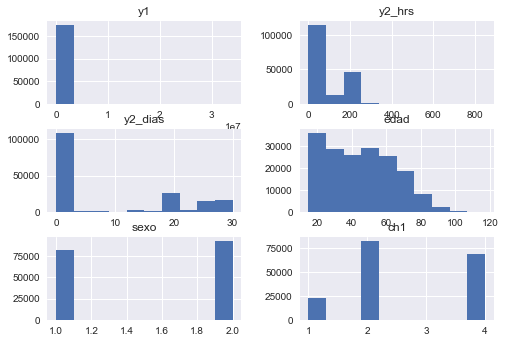

In [202]:
d_casen2.hist()

#Regresion lineal simple entre variable "y2_dias" y "ch1"
#Donde podemos apreciar que la variable 'x' representa los dias trabajados 'y' la variable y representa la actividad (si posee trabajo o no).
Existen valores atipicos en nuestra regresion lineal (desviacion), lo que puede resultar sesgada.
En nuestra regresion exite una correlacion positiva, si una variable aumenta la otra tambien aumenta
Con un coeficiente de determinación : 0.79 se puede hacer referencia a que el modelo puede explicar el 79% de la variabilidad del atributo de salida dependiente, esto significa que indica buenos resultados. 

In [298]:
X = d_casen2['y2_dias']
X = X.to_numpy().reshape((-1, 1))
Y = d_casen2['ch1']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

In [299]:
# Implementando el modelo
model = LinearRegression()


# Entrenando el modelo
model.fit(X_train, Y_train)

r_sq = model.score(X_train, Y_train)
print("coeficiente de determinación : {} ".format(r_sq))


print("interceptor: {} ".format(model.intercept_))
print("inclinacion: {} ".format(model.coef_))

# Prediciendo
prediccion = model.predict(X_test)
print("Respuesta de predicción:\n {} ".format(prediccion))


# Predicción manual
pred_manual = model.intercept_ + model.coef_ * X_test
print("respuesta de la prediccion:\n {}".format(pred_manual))

coeficiente de determinación : 0.7933215438756689 
interceptor: 1.900733028686149 
inclinacion: [0.0874024] 
Respuesta de predicción:
 [1.90073303 1.90073303 1.90073303 ... 4.52280507 1.90073303 1.90073303] 
respuesta de la prediccion:
 [[1.90073303]
 [1.90073303]
 [1.90073303]
 ...
 [4.52280507]
 [1.90073303]
 [1.90073303]]


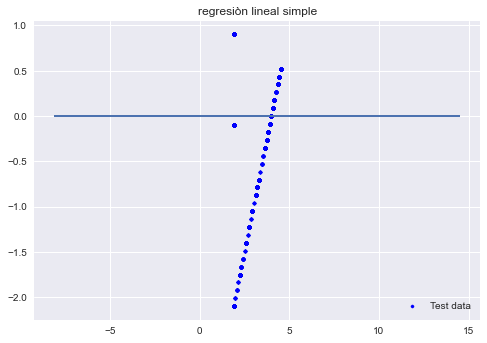

In [300]:
plt.style.use('seaborn')

## Graficando la diferencia de errores del test data
plt.scatter(prediccion, prediccion - Y_test, color = "blue", s = 10, label = 'Test data')

## Graficando una Línea horizontal
plt.hlines(y = 0, xmin = min(prediccion)-10, xmax = max(prediccion)+10, linewidth = 2)


## Escribiendo la leyenda del grafico
plt.legend(loc = 'lower right')

## Escribiendo el título
plt.title("regresiòn lineal simple")
plt.show()

Regresiòn multiple existe una correlacion positiva entre las variables , si una variable aumenta la otra tambien aumenta, es decir si aumentan los dias trabajados aumentara el sueldo a recibir.
 Tambien podemos observar valores atipicos en nuestra regresion lineal.

In [301]:
# creando grupo X e Y
X = d_casen2[['y1','ch1']]
Y = d_casen2['y2_dias']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

X_train

,y1,ch1
18467,550000.0,4.0
48348,0.0,2.0
82262,0.0,2.0
127337,0.0,1.0
49403,0.0,2.0
...,...,...
201069,240000.0,4.0
215195,0.0,1.0
164027,0.0,4.0
107471,0.0,2.0


In [302]:
# Implementando el modelo
model = LinearRegression()


# Entrenando el modelo
model.fit(X_train, Y_train)

r_sq = model.score(X_train, Y_train)
print("coeficiente de determinación : {} ".format(r_sq))


print("interceptor: {} ".format(model.intercept_))
print("inclinacion: {} ".format(model.coef_))

# Prediciendo
prediccion = model.predict(X_test)
print("Respuesta de predicción:\n {} ".format(prediccion))

coeficiente de determinación : 0.7982457214539175 
interceptor: -14.755478140856876 
inclinacion: [2.15844879e-06 8.65583620e+00] 
Respuesta de predicción:
 [ 2.55619427  2.55619427  2.55619427 ... 20.45064785  2.55619427
  2.55619427] 


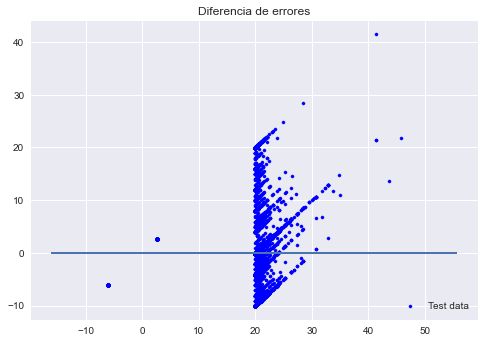

In [303]:
# Escogiendo estilo de grafico
plt.style.use('seaborn')

## Graficando la diferencia de errores del test data
plt.scatter(prediccion, prediccion - Y_test, color = "blue", s = 10, label = 'Test data')

## Graficando una Línea horizontal
plt.hlines(y = 0, xmin = min(prediccion)-10, xmax = max(prediccion)+10, linewidth = 2)


## Escribiendo la leyenda del grafico
plt.legend(loc = 'lower right')

## Escribiendo el título
plt.title("Diferencia de errores")


## Método para mostrar el gráfico
plt.show()